#### Lets check how many classes we have and how the labels are distributed

Total images: 4750
Total classes: 12
Common Chickweed
Fat Hen
Shepherds Purse
Black-grass
Scentless Mayweed
Loose Silky-bent
Small-flowered Cranesbill
Maize
Cleavers
Sugar beet
Common wheat
Charlock


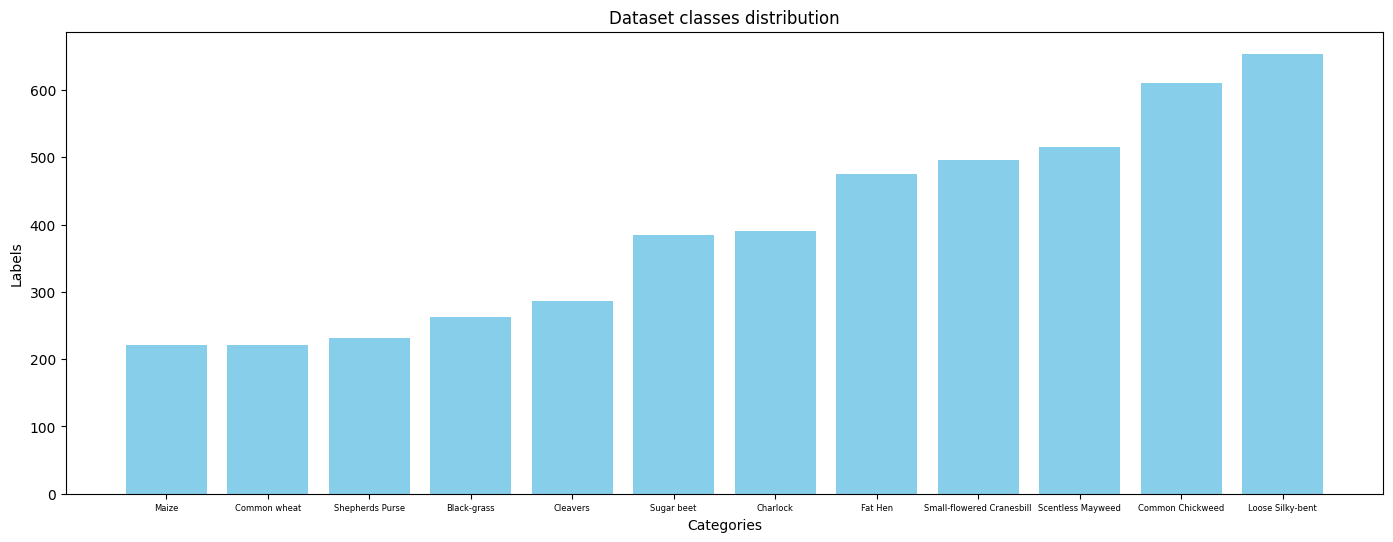

In [10]:
import pandas as pd
from matplotlib import pyplot as plt

LABEL_COLUMN = 1

CSV_PATH = '../data/all_images.csv'
dataset_pd = pd.read_csv(CSV_PATH, header=None)

labels = set(dataset_pd[LABEL_COLUMN])
print(f'Total images: {len(dataset_pd)}')
print(f'Total classes: {len(labels)}')
print(*labels, sep='\n')

stats = {label:len(dataset_pd.loc[dataset_pd[LABEL_COLUMN]==label]) 
    for label in labels}
stats = dict(sorted(stats.items(), key=lambda item: item[1]))

labels = list(stats.keys())
quantity = list(stats.values())

plt.figure(figsize=(17, 6))
plt.bar(labels, quantity, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Labels')
plt.title('Dataset classes distribution')
plt.xticks(fontsize=6)
plt.show()

## Model evaluation

In [6]:
# NOTE: Replace this with your project root directory
PROJECT_PATH = '/home/maxim/projects/tryolabs-challenge'

                           precision    recall  f1-score   support

              Black-grass       0.72      0.52      0.60        56
                 Charlock       0.96      0.98      0.97        81
                 Cleavers       0.91      0.96      0.94        53
         Common Chickweed       0.92      0.96      0.94       119
             Common wheat       0.78      0.76      0.77        37
                  Fat Hen       0.94      0.91      0.92        98
         Loose Silky-bent       0.76      0.90      0.82       126
                    Maize       0.95      0.97      0.96        36
        Scentless Mayweed       1.00      0.92      0.96       118
          Shepherds Purse       0.83      0.80      0.82        50
Small-flowered Cranesbill       0.98      0.98      0.98       103
               Sugar beet       0.93      0.92      0.92        73

                 accuracy                           0.90       950
                macro avg       0.89      0.88      0.88    

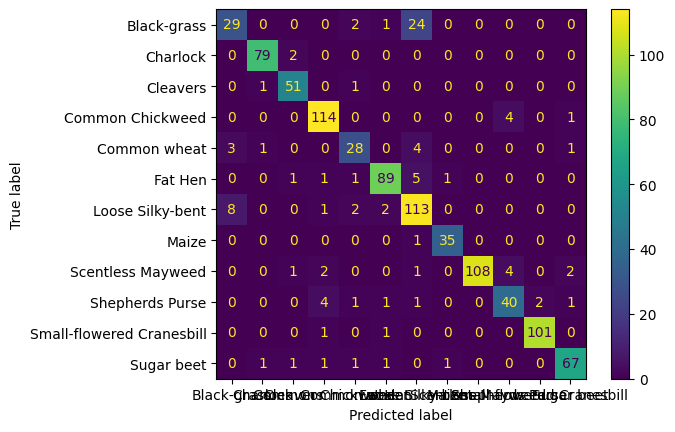

In [7]:
import sys
sys.path.append(PROJECT_PATH)
from classification_models import GrassClassificationModel
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from utils.utils import EvalDataset, collate_fn

val_data_path = '../models/test_masked_tiny_10/val_data.csv'
image_folder = '../data/masked/'
model_path = '../models/test_masked_tiny_10/checkpoint-2370'

dataset = EvalDataset(
    dataset_csv=val_data_path, folder_path=image_folder)
eval_dataloader = DataLoader(
    dataset=dataset, batch_size=64, collate_fn=collate_fn)
model = GrassClassificationModel(model_path=model_path)

y_true = list()
y_pred = list()

for images_batch, labels_batch in eval_dataloader:

    preds, _ = model.run_inference(images=images_batch)
    y_true.extend(labels_batch)
    y_pred.extend(preds)

print(classification_report(y_true=y_true, y_pred=y_pred))
ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred)

## Segmentation Examples

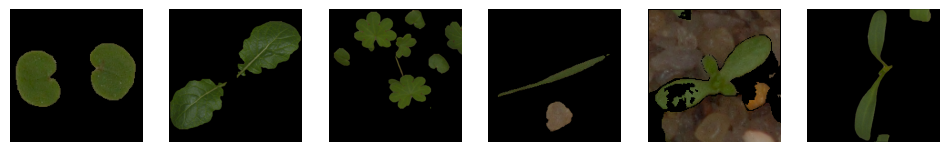

In [4]:
import supervision as sv
from PIL import Image
import os

examples_path = '../report/segm_examples'
example_images = os.listdir(examples_path)

images2show = [
    Image.open(os.path.join(examples_path, img)) for img in example_images]

sv.plot_images_grid(images2show, (1, len(images2show)))


## Black-grass vs Loose Silky-bent

In [26]:
CSV_PATH = '../data/all_images.csv'
image_folder = '../data/images/'

qty = 4
black_grass_label = 'Black-grass'
loose_silky_label = 'Loose Silky-bent'
titles = [black_grass_label] * qty + [loose_silky_label] * qty

df = pd.read_csv(CSV_PATH, header=None)
# keep 4 samples of each class
df_filter = df[df[1].isin([black_grass_label, loose_silky_label])]
df_filter = df_filter.groupby(1).apply(lambda x: x.head(qty)).reset_index(drop=True)

images2show = list()

for label in [black_grass_label, loose_silky_label]:
    images_per_class = [
        Image.open(os.path.join(image_folder, name)) 
        for name in df_filter[df_filter[1] == label][0]]
    images2show.extend(images_per_class)

sv.plot_images_grid(images2show, titles=titles, grid_size=(2, qty))

               0            1
0  5a1295fb4.png  Black-grass
1  d8afd58f3.png  Black-grass
2  418808d19.png  Black-grass
3  eac39cfa8.png  Black-grass
